### Presentado por:
- Christian Rojas
- Daniel Parrado
- Liz Ardila
- Sara Nicholls

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [365]:
analisis = {'BABA':{'analisis_1':'Por medio de la gráfica se puede evidenciar valores entre 0.1 y 0.2, lo que sugiere que el mercado \npara el periodo analizado la infravaloro donde tuvo más importancia su valor contable que su valor \nde mercado, lo que a su vez se podria ver como una oportunidad de inversión al estar subvaluada\nademás conjuntamente se evidencia una tendencia bajista tanto para su Price Book Value como para\nsu precio de cierre, lo que podria indicar una falta de confianza por parte de los inversores en el\ncrecimiento de la misma.','analisis_2':'Por medio de la gráfica se puede decir que para el periodo analizado los inversionistas tuvieron\nexpectativas de crecimiento para el 2024 de la empresa, de modo que estan dispuestos a pagar un precio\nmás alto por cada unidad de beneficio respecto al año anterior (2023). Conjuntamente nos indica el\nnumero de años que la empresa puede tardar en generar los beneficios que se ha pagado y a lo que respecta\nal per medio del mercado se puede identificar que se encuentra en promedio por debajo de el, lo que supone\nuna oportunidad de inversión desde nuestra perspectiva.'},
            'BIDU':{'analisis_1':'Por medio de la gráfica se puede evidenciar valores cercanos al 0.1, lo que sugiere que el mercado la esta\ninfravalorando, mientras cae simultáneamente su ultima cotización lo que a su vez se podria ver como una\noportunidad de inversión al estar subvaluada. Además conjuntamente se evidencia una tendencia bajista tanto\npara su Price Book Value como para su precio de cierre, lo que podria indicar una falta de confianza por\nparte de los inversores en el crecimiento de la misma.','analisis_2':'Como se puede evidenciar en la gráfica su PER es alto respecto al promedio del periodo de\nestudio de un año, lo que podria considerarse como una acción sobrevalorada y en crecimiento,\nno obstante para afirmar esto se sugiere comparar con el PER de otras empresas del mismo sector\npara llevar a cabo una mejor decisión.'},
            'JD':{'analisis_1':'Por medio de la gráfica se puede evidenciar que para el periodo de mayo hasta octubre de 2023\nel Price Book Value se encontraba por encima de su precio de cierre, el cual percibimos como\nuna expectativa de más alta de crecimiento por parte de la compañia, mientras que para el\nperiodo de análisis restante bajo considerablemente. Esto tras la caida del precio de la acción\nen agosto, donde las expectativas acabaron cercanos al 0.13. Adicionalmente, los valores del\nPrice Book Value se encontraron entre 0.1 y 0.2, lo que sugiere que el mercado para el periodo\nanalizado la infravaloro donde tuvo más importancia su valor contable que su valor de mercado,\nlo que a su vez se podria ver como una oportunidad de inversión al estar subvaluada.','analisis_2':'Con lo observado se puede decir que su PER se encuentra en crecimiento, lo que encontramos positivo,\nya que basandonos en la información gráfica un valor entre 10 y 15 suele considerarse normal. Adicionalmente,\nsu crecimiento puede reflejar una mayor confianza en la capacidad de la empresa para generar beneficios en\nrelación con su valor en el mercado de valores lo que sugiere un aumento en la percepción de los inversores\nsobre la solidez y el potencial de crecimiento de la empresa.'},
            'MMM':{'analisis_1':'Con respecto a las otras compañias en el periodo analizado esta muestra un comportamiento particular,\nmientras que su precio de cierre no tiene una tendencia clara (consideramos que puede deberse a factores\ntanto internos como externos que le haya dificultado la estimación del precio por acción), su Price Book\nValue durante el periodo de 2023 mostro un incremento considerable en el que puntualizamos que su incremento\nse debe a la drastica reducción en su valor contable por acción (el que representa un cambio del 69% desde\nfinales de julio a inicios de julio). De este modo, la relación entre ambas puede representar una buena\noportunidad de inversión si al compararlo con otros ratios financieros demuestra una buena salud financiera ','analisis_2':'Por lo que se puede observar en la gráfica MMM tiene un PER bastante variante a lo largo del año\nanalizado, el que no muestra una imagen clara sobre la situación en relación a los beneficios\nque esperan los inversionistas. Consideramos que la variación evidenciada en el precio de cierre\nguarda relación con la dinamica del PER donde aún el mercado aún no llega a un consenso de su\nprecio y por ende de las expectativas de la empresa. Habría entonces que considerar otros\nindicadores para tener un mejor panorama ya que por si solo el PER variante no permite determinar\nsu proyección.'},
            'IMXI':{'analisis_1':'Se puede evidenciar que su Price Book Value tiene bastante relación con su precio de cierre, en consecuencia\npercibimos una acción más barata y por ello que el mercado este dispuesto a pagar menos por ella. Teniendo\nen cuenta que el PER es relativamente bajo pero positivo consideramos que los inversores pueden tener\nexpectativas de crecimiento. Aunque el mercado actualmente valore la acción por debajo de su valor contable,\nexiste confianza en que la empresa pueda aumentar su rentabilidad y generar mayores beneficios en el futuro.','analisis_2':'Se puede evidenciar un mayor desinteres durante el año analizado, hasta llegar a un PER cercano\na 40 en el que se puede suponer una menor disposición por parte del mercado, teniendo en cuenta\nel desarrollo del precio de la acción. No obstante para llevar a cabo una decisión más apropiada,\n se sugiere que se tomen en cuenta otros indicadores que puedan clarificar el panorama, puesto que\nsu decrecimiento puede indicar una oportunidad para recuperar los beneficios que se han pagado.'}
            }

In [213]:
def activite(action):
    donnees = pd.read_excel(io='donnees.xlsx', sheet_name=action,header=0, names=None, index_col=None)
    prix_de_cloture = donnees.iloc[:,:2]
    prix_de_cloture['Date'] = pd.to_datetime(prix_de_cloture['Date'])
    patrimoine = donnees.iloc[0:4,3:5]
    patrimoine.rename(columns={'Date.1':'Date'},inplace=True)
    action_en_circulation = donnees.iloc[:,6:8]
    action_en_circulation.rename(columns={'Date.2':'Date'},inplace=True)
    benefice_net = donnees.iloc[0:4,9:11]
    benefice_net.rename(columns={'Date.3':'Date'},inplace=True)
    
    
    pbv_dict = dict()
    for i in range(len(prix_de_cloture)):
        if pd.to_datetime('2023-03-19') <= prix_de_cloture.iloc[i,0] < patrimoine.iloc[1,0]:
            pbv = (prix_de_cloture.iloc[i,1]*action_en_circulation.iloc[i,1])/(patrimoine.iloc[0,1])
            pbv_dict[prix_de_cloture.iloc[i,0]] = pbv
        elif patrimoine.iloc[1,0] <= prix_de_cloture.iloc[i,0] < patrimoine.iloc[2,0]:
            pbv = (prix_de_cloture.iloc[i,1]*action_en_circulation.iloc[i,1])/(patrimoine.iloc[1,1])
            pbv_dict[prix_de_cloture.iloc[i,0]] = pbv
        elif patrimoine.iloc[2,0] <= prix_de_cloture.iloc[i,0] < patrimoine.iloc[3,0]:
            pbv = (prix_de_cloture.iloc[i,1]*action_en_circulation.iloc[i,1])/(patrimoine.iloc[2,1])
            pbv_dict[prix_de_cloture.iloc[i,0]] = pbv
        elif patrimoine.iloc[3,0] <= prix_de_cloture.iloc[i,0] <= pd.to_datetime('2024-03-19'):
            pbv = (prix_de_cloture.iloc[i,1]*action_en_circulation.iloc[i,1])/(patrimoine.iloc[3,1])
            pbv_dict[prix_de_cloture.iloc[i,0]] = pbv
            

    price_book_value = pd.DataFrame(list(pbv_dict.items()), columns=['Date', 'Price Book Value'])


    per_dict = dict()
    for i in range(len(prix_de_cloture)):
        if pd.to_datetime('2023-03-19') <= prix_de_cloture.iloc[i,0] < benefice_net.iloc[1,0]:
            per_1 = (prix_de_cloture.iloc[i,1]*action_en_circulation.iloc[i,1])/(benefice_net.iloc[0,1])
            per_dict[prix_de_cloture.iloc[i,0]] = per_1
        elif benefice_net.iloc[1,0] <= prix_de_cloture.iloc[i,0] < benefice_net.iloc[2,0]:
            per_1 = (prix_de_cloture.iloc[i,1]*action_en_circulation.iloc[i,1])/(benefice_net.iloc[1,1])
            per_dict[prix_de_cloture.iloc[i,0]] = per_1
        elif benefice_net.iloc[2,0] <= prix_de_cloture.iloc[i,0] < benefice_net.iloc[3,0]:
            per_1 = (prix_de_cloture.iloc[i,1]*action_en_circulation.iloc[i,1])/(benefice_net.iloc[2,1])
            per_dict[prix_de_cloture.iloc[i,0]] = per_1
        elif benefice_net.iloc[3,0] <= prix_de_cloture.iloc[i,0] <= pd.to_datetime('2024-03-19'):
            per_1 = (prix_de_cloture.iloc[i,1]*action_en_circulation.iloc[i,1])/(benefice_net.iloc[3,1])
            per_dict[prix_de_cloture.iloc[i,0]] = per_1
            

    per = pd.DataFrame(list(per_dict.items()), columns=['Date', 'PER'])

    graphique_1 = pd.merge(price_book_value,prix_de_cloture, on='Date')
    graphique = pd.merge(graphique_1,per, on='Date')
    display(graphique)

    fig, ax1 = plt.subplots()
    sns.lineplot(data=graphique, x='Date', y='Prix de clôture', label='Precio de Cierre', color='cornflowerblue')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio de Cierre', color='cornflowerblue')


    ax2 = ax1.twinx()
    sns.lineplot(data=graphique, x='Date', y='Price Book Value', label='Price Book Value',color=(0.85, 0.58, 0.93))
    ax2.set_ylabel('Price Book Value', color=(0.85, 0.58, 0.93))

    legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1.01, 1.02))
    legend2 = ax2.legend(loc='upper right', bbox_to_anchor=(1.01, 0.949))

    plt.title(action)
    plt.xlabel('Fecha')
    plt.ylabel('Valores')

    plt.show()

    print('\nAnálisis:')
    print(analisis[action]['analisis_1'])
    print('\n')

    # Gráfica 2
    sns.lineplot(data=graphique, x='Date', y='PER', label='PER', color=(0.98, 0.56, 0.85))
    plt.title(action)
    plt.xlabel('Fecha')
    plt.ylabel('Multiplos')


    plt.show()

    print('\nAnálisis:')
    print(analisis[action]['analisis_2'])
    print('\n')

### - **BABA**

,Date,Price Book Value,Prix de clôture,PER
0,2023-03-20,0.186468,81.00,8.855910
1,2023-03-21,0.192684,83.70,9.151107
2,2023-03-22,0.192569,83.65,9.145640
3,2023-03-23,0.199176,86.52,9.459424
4,2023-03-24,0.200051,86.90,9.500970
...,...,...,...,...
247,2024-03-13,0.170069,76.39,13.348826
248,2024-03-14,0.163412,73.40,12.826336
249,2024-03-15,0.163457,73.42,12.829831
250,2024-03-18,0.163680,73.52,12.847306


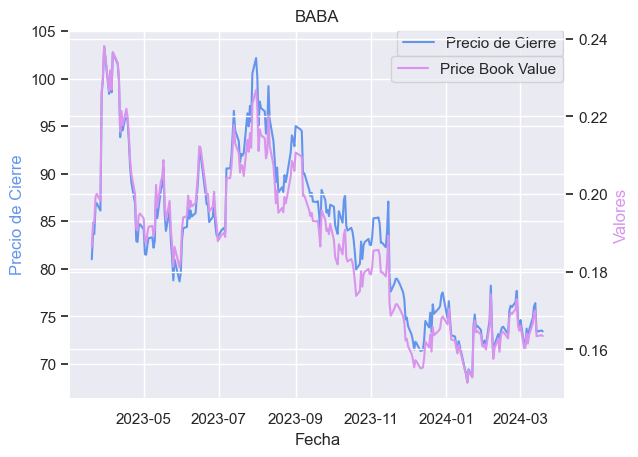


Análisis:
Por medio de la gráfica se puede evidenciar valores entre 0.1 y 0.2, lo que sugiere que el mercado 
para el periodo analizado la infravaloro donde tuvo más importancia su valor contable que su valor 
de mercado, lo que a su vez se podria ver como una oportunidad de inversión al estar subvaluada
además conjuntamente se evidencia una tendencia bajista tanto para su Price Book Value como para
su precio de cierre, lo que podria indicar una falta de confianza por parte de los inversores en el
crecimiento de la misma.




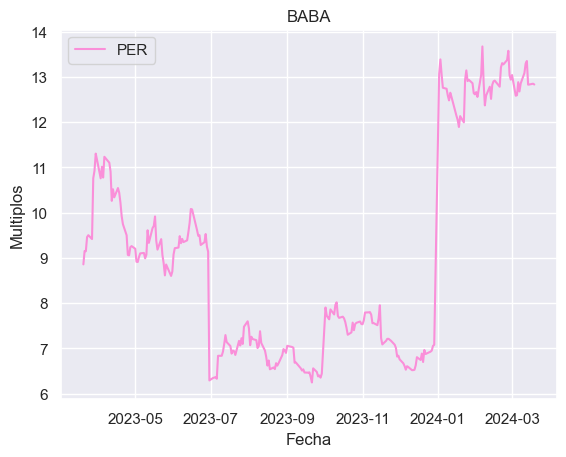


Análisis:
Por medio de la gráfica se puede decir que para el periodo analizado los inversionistas tuvieron
expectativas de crecimiento para el 2024 de la empresa, de modo que estan dispuestos a pagar un precio
más alto por cada unidad de beneficio respecto al año anterior (2023). Conjuntamente nos indica el
numero de años que la empresa puede tardar en generar los beneficios que se ha pagado y a lo que respecta
al per medio del mercado se puede identificar que se encuentra en promedio por debajo de el, lo que supone
una oportunidad de inversión desde nuestra perspectiva.




In [366]:
activite('BABA')

### - **BIDU**

,Date,Price Book Value,Prix de clôture,PER
0,2023-03-20,0.167202,150.18,7.106492
1,2023-03-21,0.168950,151.75,7.180784
2,2023-03-22,0.169285,148.66,7.195016
3,2023-03-23,0.171847,150.91,7.303914
4,2023-03-24,0.177951,156.27,7.563334
...,...,...,...,...
247,2024-03-13,0.115826,107.89,11.703304
248,2024-03-14,0.112337,104.64,11.350763
249,2024-03-15,0.111500,103.86,11.266153
250,2024-03-18,0.113725,104.77,11.491040


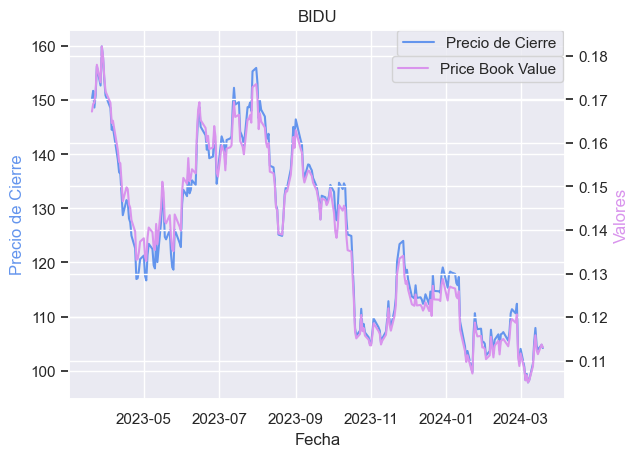


Análisis:
Por medio de la gráfica se puede evidenciar valores cercanos al 0.1, lo que sugiere que el mercado la esta
infravalorando, mientras cae simultáneamente su ultima cotización lo que a su vez se podria ver como una
oportunidad de inversión al estar subvaluada. Además conjuntamente se evidencia una tendencia bajista tanto
para su Price Book Value como para su precio de cierre, lo que podria indicar una falta de confianza por
parte de los inversores en el crecimiento de la misma.




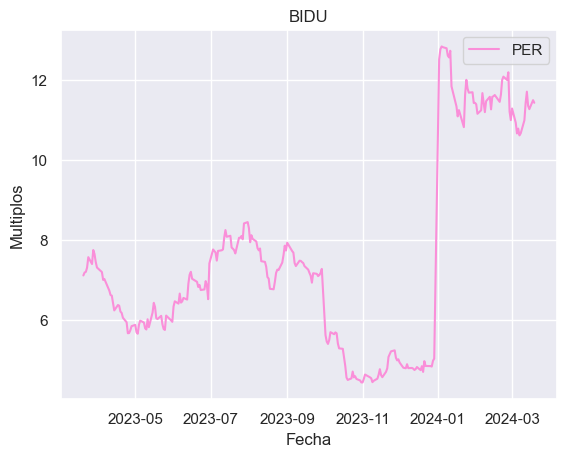


Análisis:
Como se puede evidenciar en la gráfica su PER es alto respecto al promedio del periodo de
estudio de un año, lo que podria considerarse como una acción sobrevalorada y en crecimiento,
no obstante para afirmar esto se sugiere comparar con el PER de otras empresas del mismo sector
para llevar a cabo una mejor decisión.




In [368]:
activite('BIDU')

### - **JD**

,Date,Price Book Value,Prix de clôture,PER
0,2023-03-20,0.192692,38.66,8.432919
1,2023-03-21,0.197078,39.54,8.624873
2,2023-03-22,0.191894,38.50,8.398018
3,2023-03-23,0.199720,40.07,8.740482
4,2023-03-24,0.200816,40.29,8.788471
...,...,...,...,...
247,2024-03-13,0.130261,28.01,11.391788
248,2024-03-14,0.125797,27.05,11.001352
249,2024-03-15,0.127657,27.45,11.164034
250,2024-03-18,0.129517,27.85,11.326716


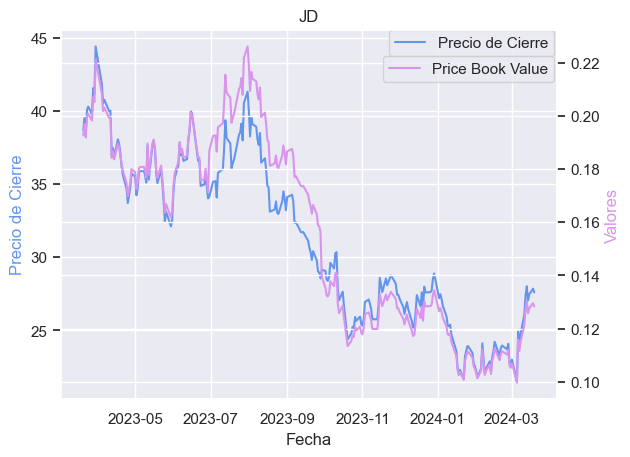


Análisis:
Por medio de la gráfica se puede evidenciar que para el periodo de mayo hasta octubre de 2023
el Price Book Value se encontraba por encima de su precio de cierre, el cual percibimos como
una expectativa de más alta de crecimiento por parte de la compañia, mientras que para el
periodo de análisis restante bajo considerablemente. Esto tras la caida del precio de la acción
en agosto, donde las expectativas acabaron cercanos al 0.13. Adicionalmente, los valores del
Price Book Value se encontraron entre 0.1 y 0.2, lo que sugiere que el mercado para el periodo
analizado la infravaloro donde tuvo más importancia su valor contable que su valor de mercado,
lo que a su vez se podria ver como una oportunidad de inversión al estar subvaluada.




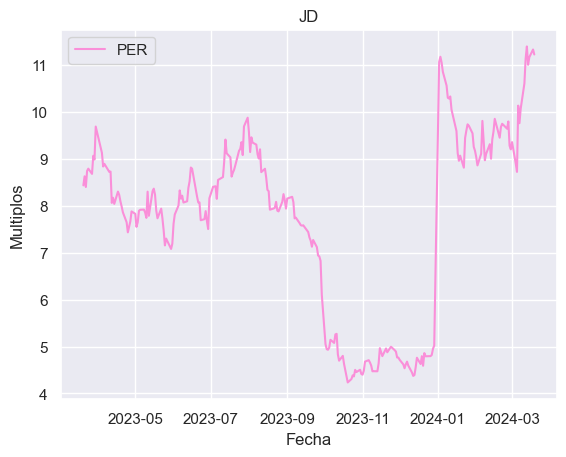


Análisis:
Con lo observado se puede decir que su PER se encuentra en crecimiento, lo que encontramos positivo,
ya que basandonos en la información gráfica un valor entre 10 y 15 suele considerarse normal. Adicionalmente,
su crecimiento puede reflejar una mayor confianza en la capacidad de la empresa para generar beneficios en
relación con su valor en el mercado de valores lo que sugiere un aumento en la percepción de los inversores
sobre la solidez y el potencial de crecimiento de la empresa.




In [369]:
activite('JD')

### - **MMM**

,Date,Price Book Value,Prix de clôture,PER
0,2023-03-20,3.740646,104.31,58.834688
1,2023-03-21,3.739929,104.29,58.823407
2,2023-03-22,3.641311,101.54,57.272305
3,2023-03-23,3.628322,101.00,57.068001
4,2023-03-24,3.633351,101.14,57.147105
...,...,...,...,...
247,2024-03-13,11.815836,104.07,60.867184
248,2024-03-14,11.707975,103.12,60.311560
249,2024-03-15,11.921426,105.00,61.411111
250,2024-03-18,11.898718,104.80,61.294138


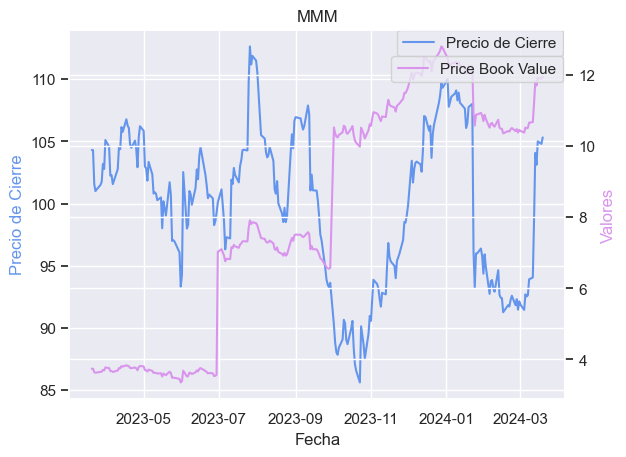


Análisis:
Con respecto a las otras compañias en el periodo analizado esta muestra un comportamiento particular,
mientras que su precio de cierre no tiene una tendencia clara (consideramos que puede deberse a factores
tanto internos como externos que le haya dificultado la estimación del precio por acción), su Price Book
Value durante el periodo de 2023 mostro un incremento considerable en el que puntualizamos que su incremento
se debe a la drastica reducción en su valor contable por acción (el que representa un cambio del 69% desde
finales de julio a inicios de julio). De este modo, la relación entre ambas puede representar una buena
oportunidad de inversión si al compararlo con otros ratios financieros demuestra una buena salud financiera 




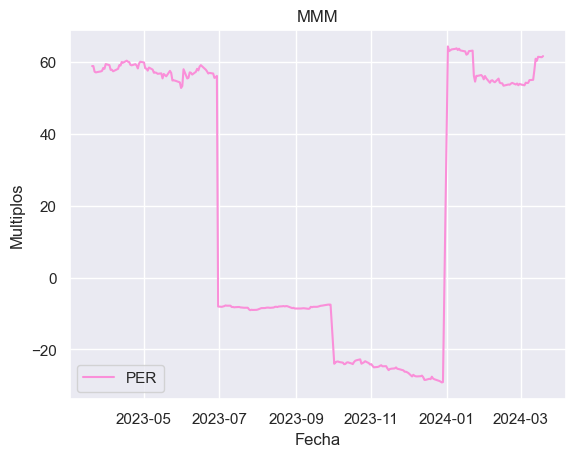


Análisis:
Por lo que se puede observar en la gráfica MMM tiene un PER bastante variante a lo largo del año
analizado, el que no muestra una imagen clara sobre la situación en relación a los beneficios
que esperan los inversionistas. Consideramos que la variación evidenciada en el precio de cierre
guarda relación con la dinamica del PER donde aún el mercado aún no llega a un consenso de su
precio y por ende de las expectativas de la empresa. Habría entonces que considerar otros
indicadores para tener un mejor panorama ya que por si solo el PER variante no permite determinar
su proyección.




In [370]:
activite('MMM')

### - **IMXI**

,Date,Price Book Value,Prix de clôture,PER
0,2023-03-20,5.467079,23.38,72.441823
1,2023-03-21,5.757036,24.62,76.283904
2,2023-03-22,5.735990,24.53,76.005043
3,2023-03-23,5.817833,24.88,77.089502
4,2023-03-24,5.827186,24.92,77.213440
...,...,...,...,...
247,2024-03-13,4.576454,20.22,38.977144
248,2024-03-14,4.646618,20.53,39.574716
249,2024-03-15,4.752994,21.00,40.480713
250,2024-03-18,4.721308,20.86,40.210842


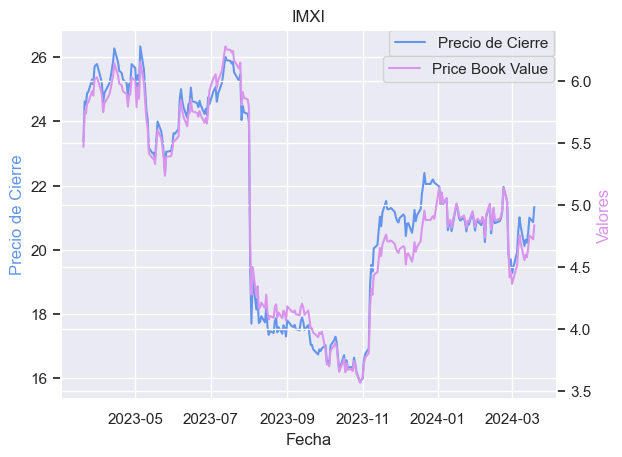


Análisis:
Se puede evidenciar que su Price Book Value tiene bastante relación con su precio de cierre, en consecuencia
percibimos una acción más barata y por ello que el mercado este dispuesto a pagar menos por ella. Teniendo
en cuenta que el PER es relativamente bajo pero positivo consideramos que los inversores pueden tener
expectativas de crecimiento. Aunque el mercado actualmente valore la acción por debajo de su valor contable,
existe confianza en que la empresa pueda aumentar su rentabilidad y generar mayores beneficios en el futuro.




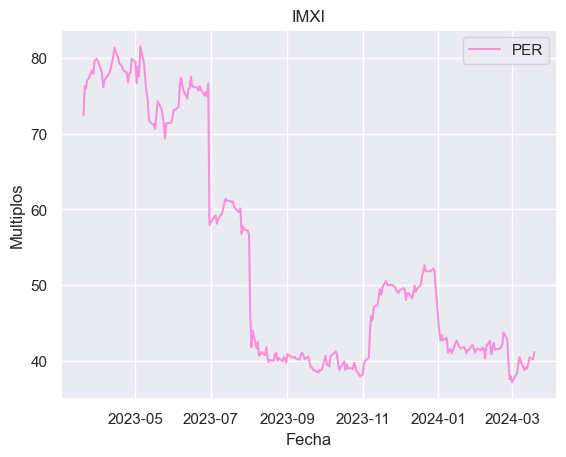


Análisis:
Se puede evidenciar un mayor desinteres durante el año analizado, hasta llegar a un PER cercano
a 40 en el que se puede suponer una menor disposición por parte del mercado, teniendo en cuenta
el desarrollo del precio de la acción. No obstante para llevar a cabo una decisión más apropiada,
 se sugiere que se tomen en cuenta otros indicadores que puedan clarificar el panorama, puesto que
su decrecimiento puede indicar una oportunidad para recuperar los beneficios que se han pagado.




In [371]:
activite('IMXI')